## **Importing libraries**

In [834]:
import numpy as np
import pandas as pd

## **Importing dataset**

In [835]:
df = pd.read_csv("cardio_train.csv", sep = ";")
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [836]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [837]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [838]:
df.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

No null values are found.



## **Removing outliers & irrelevant data**

Systolic blood pressure, measures the pressure in your arteries when your heart beats.
Diastolic blood pressure, measures the pressure in your arteries when your heart rests between beats. 
Systolic blood pressure is always greater than diastolic blood pressure.

In [839]:
df[(df['ap_lo'] > df['ap_hi'])]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
228,314,17489,2,183,98.0,160,1100,1,2,1,0,1,1
241,334,21932,2,157,60.0,160,1000,2,1,0,0,0,1
260,357,18217,1,150,83.0,140,800,1,1,0,0,1,1
329,458,23407,1,176,63.0,160,1000,2,2,0,0,0,1
345,482,18704,1,154,81.0,140,1000,2,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69771,99659,23330,1,167,81.0,160,1000,1,1,0,0,1,1
69872,99798,21808,1,152,56.0,160,1000,1,1,0,0,1,1
69878,99807,21239,2,168,95.0,160,1000,1,1,0,0,1,1
69885,99816,22417,2,166,78.0,170,1000,1,1,0,0,0,0


There are 1000+ rows of data where systoic blood pressure > diastolic blood pressure. This is not possible. Hence we drop those rows of data.

In [840]:
df.drop(df[(df['ap_lo'] > df['ap_hi'])].index,inplace=True)

In [841]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000,68766.000000
mean,49976.959878,19464.145188,1.348617,164.359916,74.114962,128.839601,81.245776,1.364657,1.225577,0.087878,0.053340,0.803449,0.494765
std,28842.637757,2468.319995,0.476536,8.190703,14.332163,155.201462,9.694132,0.678876,0.571441,0.283119,0.224713,0.397392,0.499976
min,0.000000,10798.000000,1.000000,55.000000,11.000000,12.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25008.250000,17657.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50020.500000,19701.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74865.750000,21324.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,182.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


We also notice than min & max values of ap_hi and ap_lo are outliers. We must remove them. 
We confirm this by drawing a box-plot of that variable and see outliers.
We also check for outliers on other fields too.

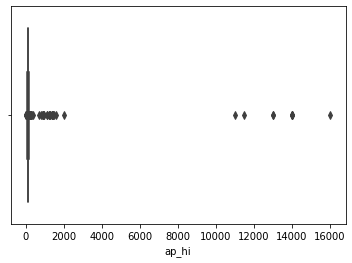

In [842]:
import seaborn as sns
sns.boxplot(x = df["ap_hi"])

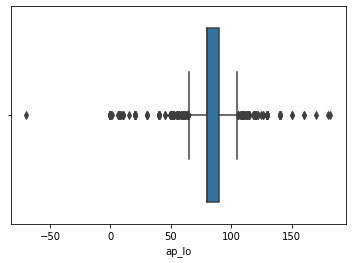

In [843]:
sns.boxplot(x = df["ap_lo"])

In [844]:
def remove_outliers(field):
    quantile1 = df[field].quantile(0.25)
    quantile2 = df[field].quantile(0.50)
    quantile3 = df[field].quantile(0.75)
    IQR = quantile3 - quantile1
    lower_bound = quantile1 - 1.5*IQR
    upper_bound = quantile3 + 1.5*IQR

    remove_filter = df[(df[field] > upper_bound) | (df[field] < lower_bound)]
    print("Removing these columns because they are outliers for field {}".format(field))
    print(remove_filter)
    df.drop(remove_filter.index, inplace = True)

In [845]:
remove_outliers("ap_hi")

Removing these columns because they are outliers for field ap_hi
          id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
59        74  20431       1     164    64.0  ...     1      1     0       1       1
61        79  20960       2     165    75.0  ...     1      0     0       1       1
101      136  18718       1     167    80.0  ...     1      0     1       0       0
209      288  18169       2     172    62.0  ...     1      0     0       1       0
230      318  23376       2     175    75.0  ...     1      1     1       1       1
...      ...    ...     ...     ...     ...  ...   ...    ...   ...     ...     ...
69587  99398  23223       1     169   101.0  ...     1      0     0       0       1
69593  99405  16781       2     179    93.0  ...     2      0     1       1       1
69830  99734  22552       2     163    67.0  ...     1      0     0       0       1
69894  99835  16857       1     160    70.0  ...     2      0     0       1       1
69997  9999

In [846]:
remove_outliers("ap_lo")

Removing these columns because they are outliers for field ap_lo
          id    age  gender  height  weight  ...  gluc  smoke  alco  active  cardio
4          4  17474       1     156    56.0  ...     1      0     0       0       0
9         14  19834       1     164    68.0  ...     1      0     0       0       0
23        33  23376       2     156    45.0  ...     1      0     0       1       0
43        58  20556       2     159    63.0  ...     1      0     0       1       1
50        65  18238       1     160    75.0  ...     1      0     0       0       0
...      ...    ...     ...     ...     ...  ...   ...    ...   ...     ...     ...
69922  99878  15334       1     165    62.0  ...     1      0     0       1       0
69929  99891  19834       1     164    85.0  ...     3      0     0       1       1
69932  99897  15243       2     171    67.0  ...     1      0     0       1       0
69937  99908  14489       1     160    53.0  ...     1      0     0       1       0
69978  9996

In [847]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000,64500.000000
mean,49966.534946,19491.981225,1.351876,164.456961,74.261272,126.624527,81.788868,1.364264,1.225659,0.087612,0.053054,0.803488,0.498388
std,28856.092134,2458.769607,0.477559,8.148030,14.142237,14.383593,7.712722,0.680277,0.572670,0.282733,0.224143,0.397363,0.500001
min,0.000000,10859.000000,1.000000,55.000000,11.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,24923.750000,17720.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50009.500000,19716.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74879.250000,21343.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


By now, we have dropped 5500 rows of data

## **Splitting into dependent and independent variables**

In [848]:
df.drop("id",axis=1,inplace=True)

In [849]:
x = df.iloc[:,:-1].values
x
print(x[0])
print(y[0])

[1.8393e+04 2.0000e+00 1.6800e+02 6.2000e+01 1.1000e+02 8.0000e+01
 1.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
0


In [850]:
y = df.iloc[:,-1].values
y

array([0, 1, 1, ..., 1, 1, 0])

## **Splitting into training and testing set**

In [851]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

## **Normalising values in independent variable**

In [852]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Logistic Regression**

In [853]:
models = ["Logistic Regression", "K Nearest Neighbors","Random Forest decision tree", "Decision tree classifier"]
accuracies = []

In [854]:

from sklearn.linear_model import LogisticRegression
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)



y_pred = logreg.predict(x_test)
predictions = [round(value) for value in y_pred]



# Predicting for single value
x_data = [[1.8393e+04, 2.0000e+00, 1.6800e+02, 6.2000e+01, 1.1000e+02,
       8.0000e+01, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00]]
y_actual = [[1]]
y_pred = logreg.predict(x_data)
print(y_pred)
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_actual, y_pred)
print(accuracy)


[1]
1.0


In [855]:
# evaluate predictions
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, predictions)
accuracies.append(accuracy)
print("Accuracy: {}".format(accuracy * 100))

Accuracy: 71.3875968992248


## **K Nearest neighbors**

In [856]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [857]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print("Accuracy: {}".format(accuracy * 100))

Accuracy: 67.90697674418604


## **Random Forest decision tree**

In [858]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [859]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print("Accuracy: {}".format(accuracy * 100))

Accuracy: 68.54263565891473


## **Decision Tree classifier**




In [860]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [861]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
accuracies.append(accuracy)
print("Accuracy: {}".format(accuracy * 100))

Accuracy: 62.76744186046511


Summarising all accuracies

In [862]:
print(models)
accuracies = [x*100 for x in accuracies]
accuracies

['Logistic Regression', 'K Nearest Neighbors', 'Random Forest decision tree', 'Decision tree classifier']


[71.3875968992248, 67.90697674418604, 68.54263565891473, 62.76744186046511]

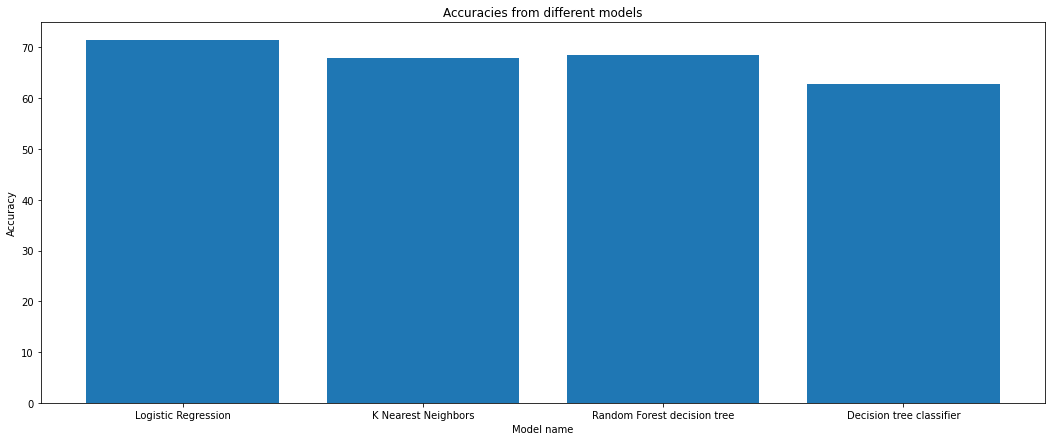

In [863]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(18,7))
plt.bar(models,accuracies)

plt.title("Accuracies from different models")
plt.ylabel("Accuracy")
plt.xlabel("Model name")
plt.show()

## **Visualizations**

Dataset gender composition

In [864]:
df["gender"].value_counts()

1    41804
2    22696
Name: gender, dtype: int64

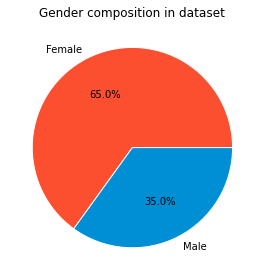

In [865]:
labels = ["Female", "Male"]
gender_count = [45530, 24470]
gender_pie_colors = ["#fc4f30", "#008fd5"]
plt.pie(gender_count, labels = labels, colors = gender_pie_colors, autopct = '%1.1f%%', wedgeprops={ "edgecolor": "white" })


plt.title("Gender composition in dataset")
plt.tight_layout()
plt.show()

% of people having cardiovascular disease in dataset

In [866]:
df["cardio"].value_counts()

0    32354
1    32146
Name: cardio, dtype: int64

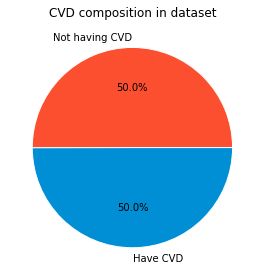

In [867]:
labels = ["Not having CVD", "Have CVD"]
cvd_count = [35021, 34979]
cvd_pie_colors = ["#fc4f30", "#008fd5"]
explode = [ 0, 0.15]

plt.pie(cvd_count, labels = labels, colors = cvd_pie_colors, autopct = '%1.1f%%', wedgeprops={ "edgecolor": "white" })


plt.title("CVD composition in dataset")
plt.tight_layout()
plt.show()

In [868]:
df["gluc"].value_counts()

1    54886
3     4941
2     4673
Name: gluc, dtype: int64

In [869]:
df["cholesterol"].value_counts()

1    48461
2     8583
3     7456
Name: cholesterol, dtype: int64

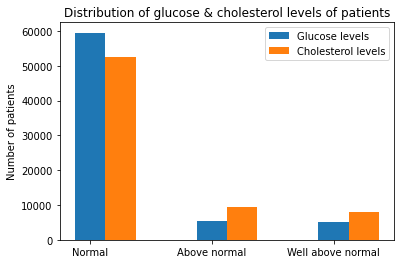

In [870]:
labels = ["Normal", "Above normal", "Well above normal"]
gluc_count = [59479, 5331, 5190]
chol_count = [52385, 9549, 8066]

x_indices = np.arange(len(labels))
bar_width = 0.25

plt.bar(x_indices, gluc_count, width=bar_width, label = "Glucose levels")
plt.bar(x_indices + bar_width, chol_count, width=bar_width, label = "Cholesterol levels")

plt.xticks(x_indices, labels)
plt.legend()
plt.title("Distribution of glucose & cholesterol levels of patients")
plt.ylabel("Number of patients")
#plt.xlabel("Categories of glucose & cholesterol levels")
plt.show()

In [871]:
df["smoke"].value_counts()

0    58849
1     5651
Name: smoke, dtype: int64

In [872]:
df["active"].value_counts()

1    51825
0    12675
Name: active, dtype: int64

In [873]:
df["alco"].value_counts()

0    61078
1     3422
Name: alco, dtype: int64

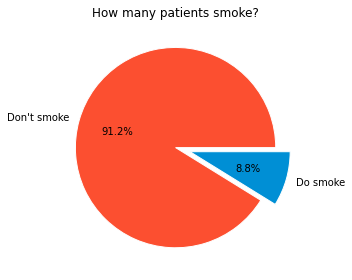

In [874]:
labels = ["Don't smoke", "Do smoke"]
smoke_count = [63831, 6169]
smoke_pie_colors = ["#fc4f30", "#008fd5"]
explode = [ 0, 0.15]

plt.pie(smoke_count, labels = labels, explode = explode,colors = smoke_pie_colors, autopct = '%1.1f%%', wedgeprops={ "edgecolor": "white" })


plt.title("How many patients smoke?")
plt.tight_layout()
plt.show()

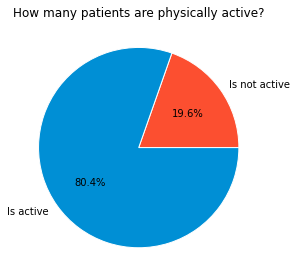

In [875]:
labels = ["Is not active", "Is active"]
active_count = [13739, 56261]
active_pie_colors = ["#fc4f30", "#008fd5"]

plt.pie(active_count, labels = labels,colors = active_pie_colors, autopct = '%1.1f%%', wedgeprops={ "edgecolor": "white" })


plt.title("How many patients are physically active?")
plt.tight_layout()
plt.show()

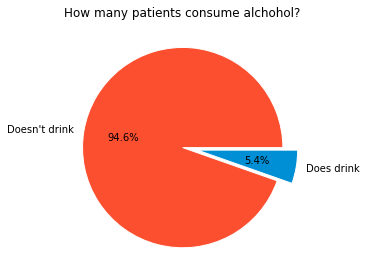

In [876]:
labels = ["Doesn't drink", "Does drink"]
alco_count  = [66236, 3764]
alco_pie_colors = ["#fc4f30", "#008fd5"]
explode = [ 0, 0.15]

plt.pie(alco_count, labels = labels, colors = alco_pie_colors, explode = explode,autopct = '%1.1f%%', wedgeprops={ "edgecolor": "white" })


plt.title("How many patients consume alchohol?")
plt.tight_layout()
plt.show()

Let's plot bar graph distribution of patient's age with cardio

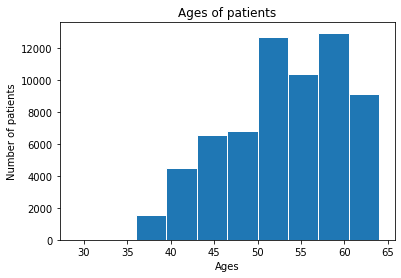

In [877]:
ages_in_years = df["age"].div(365).apply(lambda x : int(x))

plt.hist(ages_in_years, edgecolor = "white")

plt.title("Ages of patients")
plt.xlabel("Ages")
plt.ylabel("Number of patients")

plt.show()

(32146, 12)
(32354, 12)
(64500, 12)


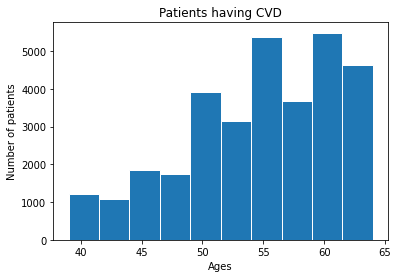

In [878]:
ages_in_years = df["age"].div(365).apply(lambda x : int(x))

remove_filter = df[(df["cardio"] == 0)]
df_cvd = df.drop(remove_filter.index)


remove_filter = df[(df["cardio"] == 1)]
df_no_cvd = df.drop(remove_filter.index)

age_cvd = df_cvd["age"].div(365).apply(lambda x : int(x))
age_no_cvd = df_no_cvd["age"].div(365).apply(lambda x : int(x))


#For debugging 
print(df_cvd.shape)
print(df_no_cvd.shape)
print(df.shape)


plt.hist(age_cvd, edgecolor = "white")

plt.title("Patients having CVD")
plt.xlabel("Ages")
plt.ylabel("Number of patients")

plt.show()

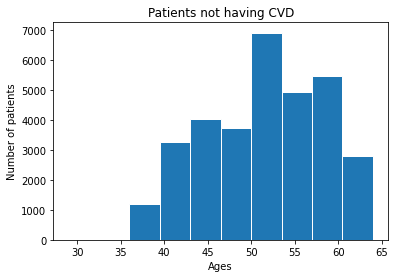

In [879]:
plt.hist(age_no_cvd, edgecolor = "white")
plt.title("Patients not having CVD")
plt.xlabel("Ages")
plt.ylabel("Number of patients")
plt.show()